In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from ipywidgets import widgets, interactive
import missingno as msno
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_colwidth', None)

In [4]:
# Load raw dataset
train_df = pd.read_csv('train_attacker_2022.csv')
test_df = pd.read_csv('test_attacker_2022.csv')

# Preview train dataset
print(train_df.shape)
train_df.head()

(48030, 66)


,id,label,time_1,time_2,Field_11,cat_1,cat_2,cat_3,cat_4,cat_5,date_1,mer_des,mul_rate,value,cat_6,num_date_review,review_value,date_2,date_3,date_4,dob,sex,address,location_id,mer_id,mer_name,cat_7,trans_location,trans_currency,cat_8,job,num_trans_last_month,cat_9,cat_10,cat_11,com_type,cat_12,job_detail,unknown_var_1,unknown_var_2,unknown_var_3,unknown_var_4,unknown_var_5,unknown_var_6,unknown_var_7,unknown_var_8,unknown_var_9,unknown_var_10,unknown_var_11,unknown_var_12,unknown_var_13,unknown_var_14,unknown_var_15,unknown_var_16,unknown_var_17,unknown_var_18,unknown_var_19,unknown_var_20,social_friend_count,social_sex_info,social_subcriber_count,social_location_id,current_location_city,current_location_country,hometown_location_city,hometown_location_country
0,11651,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,7.0,7.0,NaN,1,1.0,5.0,10.606602,-2.5,-10.0,1,NaN,NaN,NaN,NaN,1.0,2901.0,NaN,NaN,NaN,285.0,male,64.0,vi_VN,Hanoi,Vietnam,??oan Hùng,Vietnam
1,48491,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,11.0,7.0,5.0,1,1.0,84.0,55.154329,45.0,6.0,1,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,2534.0,female,391.0,vi_VN,NaN,NaN,??oan Hùng,Vietnam
2,42868,0,2017-01-23T18:00:32.69Z,2017-01-23T18:00:32.69Z,NaN,C2,P1,1.0,NaN,1.0,12/27/2012,NaN,2.26,"3,367,400",1.0,0.0,-,NaN,NaN,NaN,19810807.0,FEMALE,"Xã Lâu Thượng, Võ Nhai, Thái Nguyên",HC,DW0016Z,Kho bạc nhà nước Thái Nguyên,1.0,"Tổ 3, P.Phan Đình Phùng - TPTN",NaN,DW,Đảng đoàn thể TW,6.0,I,3.0,0.0,Vùng 2,D,NaN,4.0,4.0,4.0,1.0,3,1.0,2.0,1.414214,1.0,0.0,1,0.06,0.33,0.195,0.27,NaN,NaN,NaN,NaN,NaN,653.0,female,0.0,vi_VN,Thái Nguyên,Vietnam,??oan Hùng,Vietnam
3,68835,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,1.0,1.0,2,1.0,0.0,NaN,0.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,male,0.0,vi_VN,Can Tho,Vietnam,Ô Môn,Vietnam
4,73688,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,2.0,NaN,1cy,1.0,-92.0,NaN,-92.0,-92.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,female,0.0,vi_VN,Can Tho,Vietnam,Ô Môn,Vietnam


In [3]:
# Overview train dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48030 entries, 0 to 48029
Data columns (total 66 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         48030 non-null  int64  
 1   label                      48030 non-null  int64  
 2   time_1                     22991 non-null  object 
 3   time_2                     22991 non-null  object 
 4   Field_11                   6679 non-null   object 
 5   cat_1                      22991 non-null  object 
 6   cat_2                      22991 non-null  object 
 7   cat_3                      22991 non-null  float64
 8   cat_4                      6650 non-null   object 
 9   cat_5                      22991 non-null  float64
 10  date_1                     14139 non-null  object 
 11  mer_des                    7570 non-null   object 
 12  mul_rate                   22991 non-null  float64
 13   value                     22991 non-null  obj

In [4]:
# Overview test dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 65 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         5000 non-null   int64  
 1   time_1                     2573 non-null   object 
 2   time_2                     2573 non-null   object 
 3   Field_11                   735 non-null    object 
 4   cat_1                      2573 non-null   object 
 5   cat_2                      2573 non-null   object 
 6   cat_3                      2573 non-null   float64
 7   cat_4                      730 non-null    object 
 8   cat_5                      2573 non-null   float64
 9   date_1                     1569 non-null   object 
 10  mer_des                    817 non-null    object 
 11  mul_rate                   2573 non-null   float64
 12   value                     2573 non-null   object 
 13  cat_6                      2573 non-null   float

In [5]:
# Normalize column names of dataset
train_df.columns = [i.lower().strip() for i in train_df.columns]
test_df.columns = [i.lower().strip() for i in test_df.columns]

- Transform datetime variables

In [6]:
# Time of transactions
for feature in ['time_1','time_2']:
    train_df[feature] = pd.to_datetime(train_df[feature])
    test_df[feature] = pd.to_datetime(test_df[feature])

# Date of field_11
train_df['field_11'] = pd.to_datetime(train_df['field_11'])
test_df['field_11'] = pd.to_datetime(test_df['field_11'])

# Date variables
for date in range(1,12):
    try:
        train_df[f'date_{date}'] = pd.to_datetime(train_df[f'date_{date}'])
        test_df[f'date_{date}'] = pd.to_datetime(test_df[f'date_{date}'])
    except:
        pass

# Date of birth
train_df['dob'] = pd.to_datetime(train_df['dob'].fillna(9999).apply(lambda x:str(int(x))[:4]+'-'+str(int(x))[4:6]+'-'+str(int(x))[6:] if x != 9999 else np.nan))
test_df['dob'] = pd.to_datetime(test_df['dob'].fillna(9999).apply(lambda x:str(int(x))[:4]+'-'+str(int(x))[4:6]+'-'+str(int(x))[6:] if x != 9999 else np.nan))

- Transform categorical variables

In [7]:
# Cat 1 includes 2 classes from 1 to 2
train_df['cat_1'] = train_df['cat_1'].map({'C1':'class_1','C2':'class_2'})
test_df['cat_1'] = test_df['cat_1'].map({'C1':'class_1','C2':'class_2'})

# Cat 2 includes 2 classes from 1 to 2
train_df['cat_2'] = train_df['cat_2'].map({'P1':'class_1','P2':'class_2'})
test_df['cat_2'] = test_df['cat_2'].map({'P1':'class_1','P2':'class_2'})

# Cat 3 includes 6 classes from 0 to 5
train_df['cat_3'] = train_df['cat_3'].apply(lambda x:'class_' + str(int(x)) if (str(x) != 'nan') & (x in range(6)) else np.nan)
test_df['cat_3'] = test_df['cat_3'].apply(lambda x:'class_' + str(int(x)) if (str(x) != 'nan') & (x in range(6)) else np.nan)

# Cat 4 includes 12 classes ['UI', 'G8', 'C2', 'G3', 'GX', 'HA', 'A3', 'G7', 'J8', 'G2', 'G4', 'TM']

# Cat 5 includes only one class and should be removed

# Cat 6 includes 3 classes from 0 to 2
train_df['cat_6'] = train_df['cat_6'].apply(lambda x:'class_' + str(int(x)) if (str(x) != 'nan') & (x in range(3)) else np.nan)
test_df['cat_6'] = test_df['cat_6'].apply(lambda x:'class_' + str(int(x)) if (str(x) != 'nan') & (x in range(3)) else np.nan)

# Cat 7 includes 5 classes from 0 to 4
train_df['cat_7'] = train_df['cat_7'].apply(lambda x:'class_' + str(int(x)) if (str(x) != 'nan') & (x in range(5)) else np.nan)
test_df['cat_7'] = test_df['cat_7'].apply(lambda x:'class_' + str(int(x)) if (str(x) != 'nan') & (x in range(5)) else np.nan)

# Cat 8 includes 216 classes with random characters

# Cat 9 includes 5 classes from 1 to 5
train_df['cat_9'] = train_df['cat_9'].map({'I':1,'II':2,'III':3,'IV':4,'V':5}).apply(lambda x:'class_' + str(int(x)) if (str(x) != 'nan') & (x in range(1,6)) else np.nan)
test_df['cat_9'] = test_df['cat_9'].map({'I':1,'II':2,'III':3,'IV':4,'V':5}).apply(lambda x:'class_' + str(int(x)) if (str(x) != 'nan') & (x in range(1,6)) else np.nan)

# Cat 10 includes 10 classes from 0 to 9
train_df['cat_10'] = train_df['cat_10'].replace(43,1).apply(lambda x:'class_' + str(int(x)) if (str(x) != 'nan') & (x in range(10)) else np.nan)
test_df['cat_10'] = test_df['cat_10'].replace(43,1).apply(lambda x:'class_' + str(int(x)) if (str(x) != 'nan') & (x in range(10)) else np.nan)

# Cat 11 includes 5 classes from 1 to 5
train_df['cat_11'] = train_df['cat_11'].replace(0,1).apply(lambda x:'class_' + str(int(x)) if (str(x) != 'nan') & (x in range(1,6)) else np.nan)
test_df['cat_11'] = test_df['cat_11'].replace(0,1).apply(lambda x:'class_' + str(int(x)) if (str(x) != 'nan') & (x in range(1,6)) else np.nan)

# Cat 12 includes 8 classes from 1 to 8 
train_df['cat_12'] = train_df['cat_12'].map({'B':'class_1','C':'class_2','D':'class_3','E':'class_4','F':'class_5','G':'class_6','H':'class_7','I':'class_8'})
test_df['cat_12'] = test_df['cat_12'].map({'B':'class_1','C':'class_2','D':'class_3','E':'class_4','F':'class_5','G':'class_6','H':'class_7','I':'class_8'})

In [8]:
#Sex
train_df['sex'] = (train_df['sex'].str.lower().str.strip().fillna('') + ' ' + train_df['social_sex_info'].str.lower().str.strip().fillna(''))\
    .apply(lambda x:x.split()[0] if len(x.split()) > 0 else np.nan)
test_df['sex'] = (test_df['sex'].str.lower().str.strip().fillna('') + ' ' + test_df['social_sex_info'].str.lower().str.strip().fillna(''))\
    .apply(lambda x:x.split()[0] if len(x.split()) > 0 else np.nan)

- Transform numerical variables

In [9]:
# Transaction values
train_df['value'] = train_df['value'].str.strip().replace('-',np.nan).apply(lambda x:float(x.replace(',','')) if str(x) != 'nan' else np.nan)
test_df['value'] = test_df['value'].str.strip().replace('-',np.nan).apply(lambda x:float(x.replace(',','')) if str(x) != 'nan' else np.nan)

In [10]:
# Value under review system
train_df['review_value'] = train_df['review_value'].str.strip().replace('-',np.nan).apply(lambda x:float(x.replace(',','')) if str(x) != 'nan' else np.nan)
test_df['review_value'] = test_df['review_value'].str.strip().replace('-',np.nan).apply(lambda x:float(x.replace(',','')) if str(x) != 'nan' else np.nan)

In [11]:
# Unknown variables
train_df['unknown_var_5'] = train_df['unknown_var_5'].apply(lambda x:str(x)).str.replace('\D','',regex=True).replace('',np.nan).astype('float')
test_df['unknown_var_5'] = test_df['unknown_var_5'].apply(lambda x:str(x)).str.replace('\D','',regex=True).replace('',np.nan).astype('float')

train_df['unknown_var_11'] = train_df['unknown_var_11'].astype('float')
test_df['unknown_var_11'] = test_df['unknown_var_11'].astype('float')

- Remove duplicated data

In [12]:
train_df.drop_duplicates(inplace=True)
train_df.reset_index(drop=True,inplace=True)

- Remove redundant variables

In [13]:
removal_col = ['id','cat_5','mer_des','mer_id','mer_name','address','trans_location','trans_currency','job','social_location_id','current_location_country','hometown_location_country','hometown_location_city','social_sex_info']
train_df.drop(removal_col,axis=1,inplace=True)
test_df.drop(removal_col,axis=1,inplace=True)

print(train_df.shape)
print(test_df.shape)

(48030, 52)
(5000, 51)


- Explore missing values

cat_4                    0.861545
job_detail               0.827795
current_location_city    0.745326
com_type                 0.547304
cat_12                   0.535707
cat_8                    0.522007
cat_1                    0.521320
cat_2                    0.521320
cat_3                    0.521320
cat_6                    0.521320
location_id              0.521320
cat_7                    0.521320
cat_9                    0.521320
cat_10                   0.521320
cat_11                   0.521320
sex                      0.319842
dtype: float64


<AxesSubplot: >

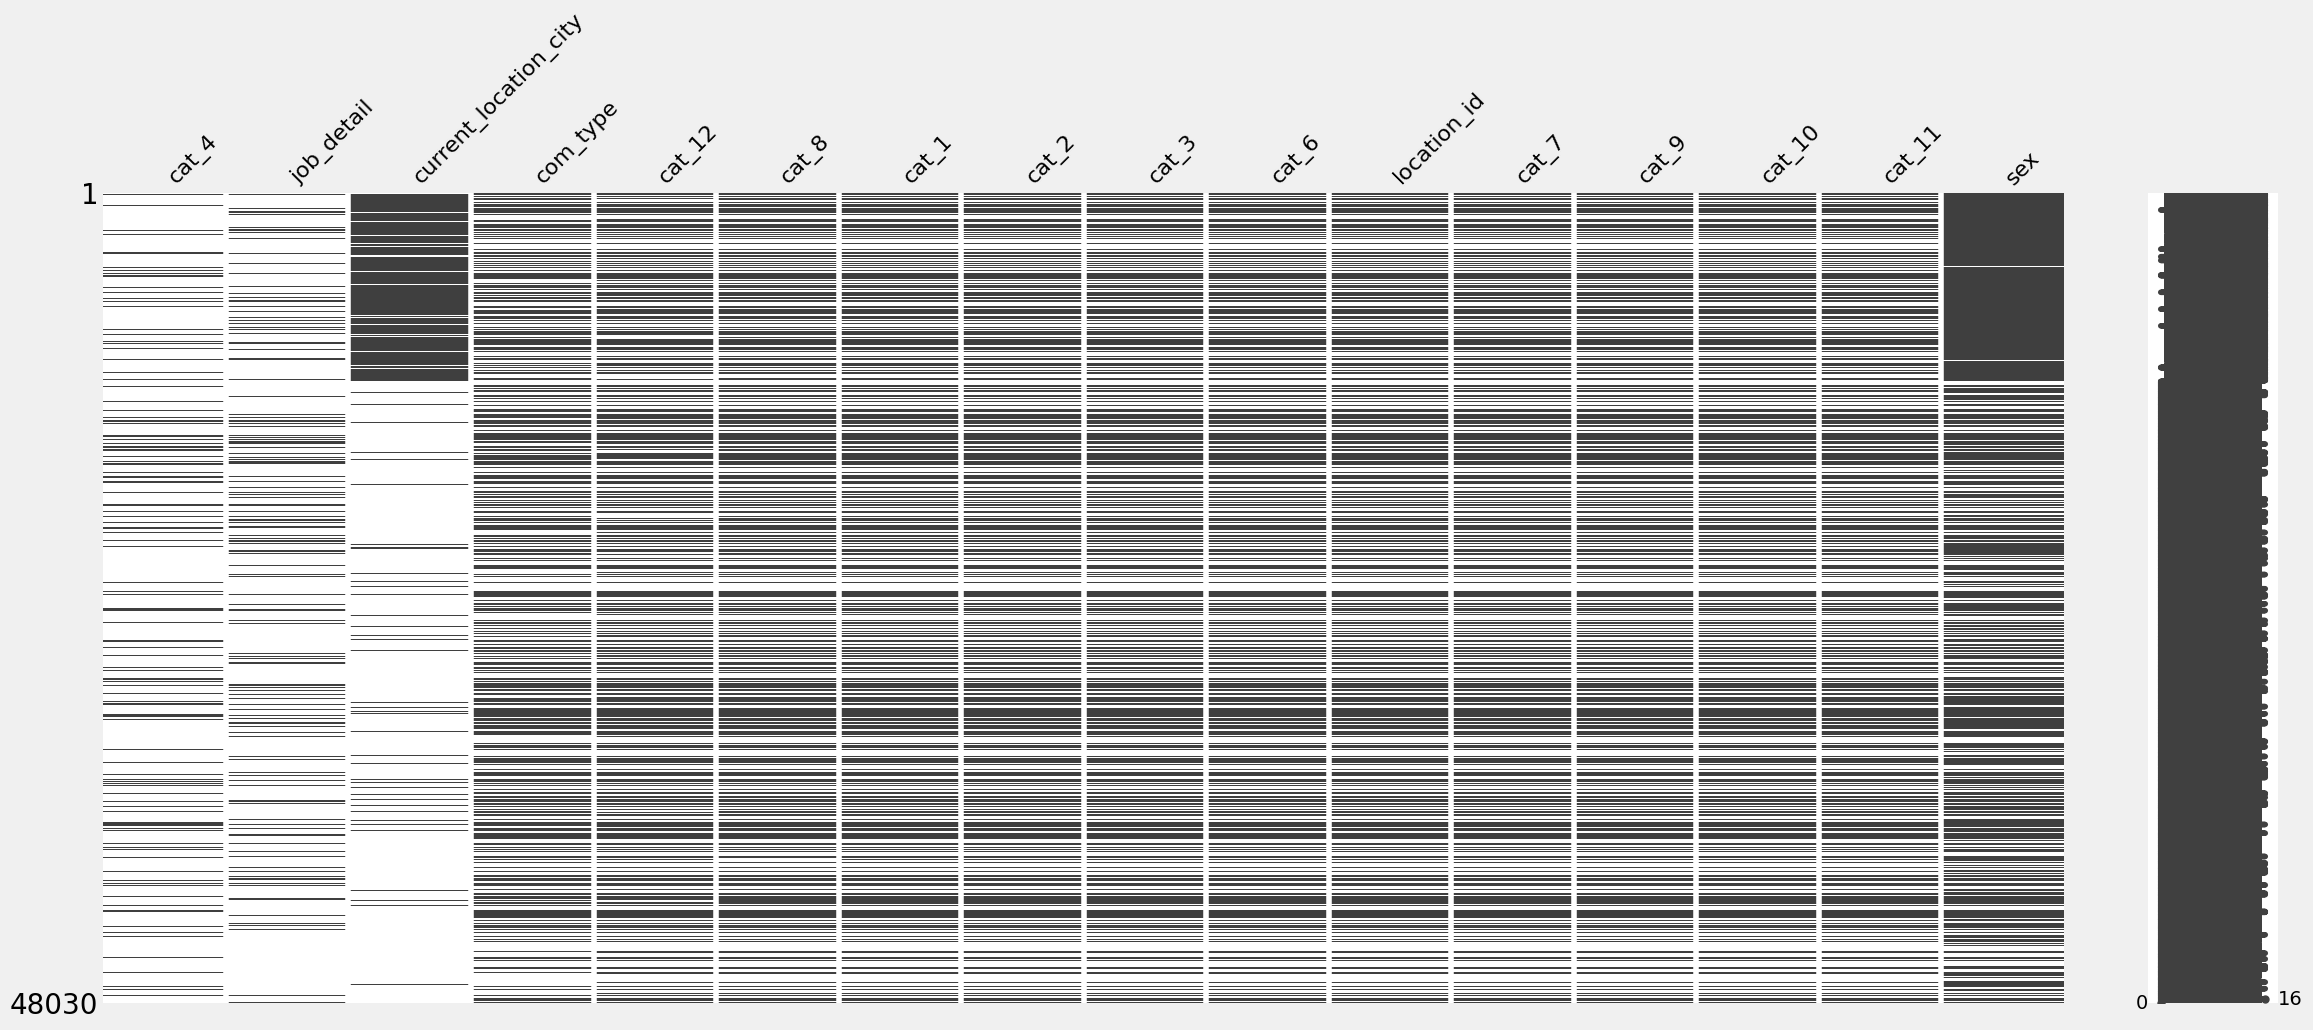

In [14]:
# Categorical variables
missing_cat = (train_df.select_dtypes(include='O').isnull().sum()/len(train_df)).sort_values(ascending=False)
with pd.option_context('display.max_rows',len(missing_cat)):
    print(missing_cat)
msno.matrix(train_df.select_dtypes(include='O').loc[:,missing_cat.index])

review_value              0.958942
unknown_var_17            0.614220
unknown_var_4             0.568936
unknown_var_20            0.554341
unknown_var_19            0.554341
unknown_var_18            0.554341
social_subcriber_count    0.549365
social_friend_count       0.549365
unknown_var_12            0.535707
value                     0.526130
unknown_var_15            0.521320
unknown_var_14            0.521320
unknown_var_13            0.521320
mul_rate                  0.521320
num_trans_last_month      0.521320
num_date_review           0.521320
unknown_var_8             0.477597
unknown_var_16            0.449656
unknown_var_3             0.329815
unknown_var_10            0.322611
unknown_var_9             0.316344
unknown_var_7             0.314866
unknown_var_2             0.236311
unknown_var_1             0.210868
unknown_var_5             0.103977
unknown_var_6             0.047928
unknown_var_11            0.000000
dtype: float64


<AxesSubplot: >

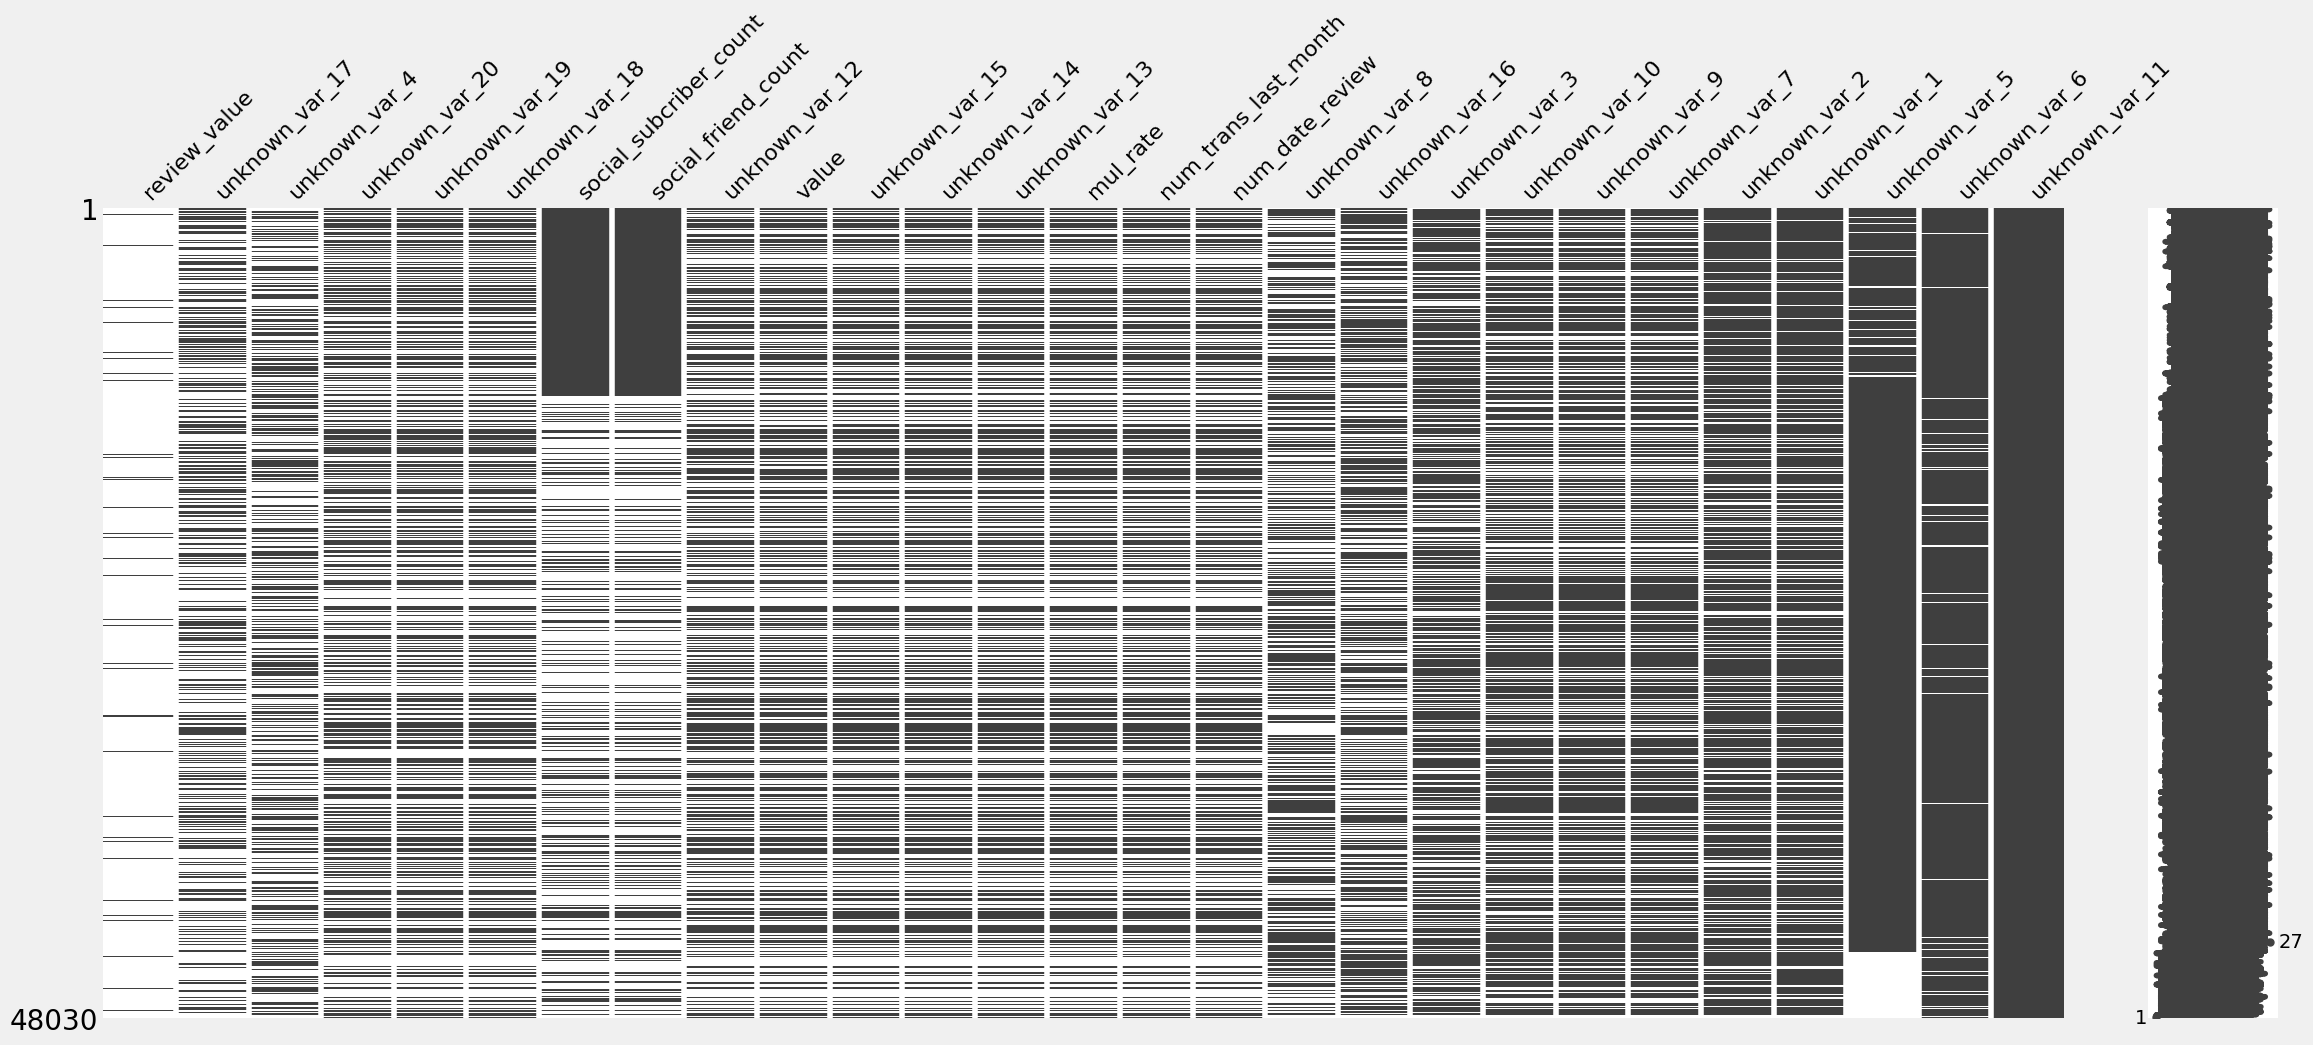

In [15]:
#Numericial variables
missing_num = (train_df.select_dtypes(include=['float']).isnull().sum()/len(train_df)).sort_values(ascending=False)
with pd.option_context('display.max_rows',len(missing_num)):
    print(missing_num)
msno.matrix(train_df.select_dtypes(exclude='O').loc[:,missing_num.index])

date_4      0.871518
field_11    0.860941
date_1      0.705621
date_3      0.564980
date_2      0.532667
time_1      0.521320
time_2      0.521320
dob         0.521320
dtype: float64


<AxesSubplot: >

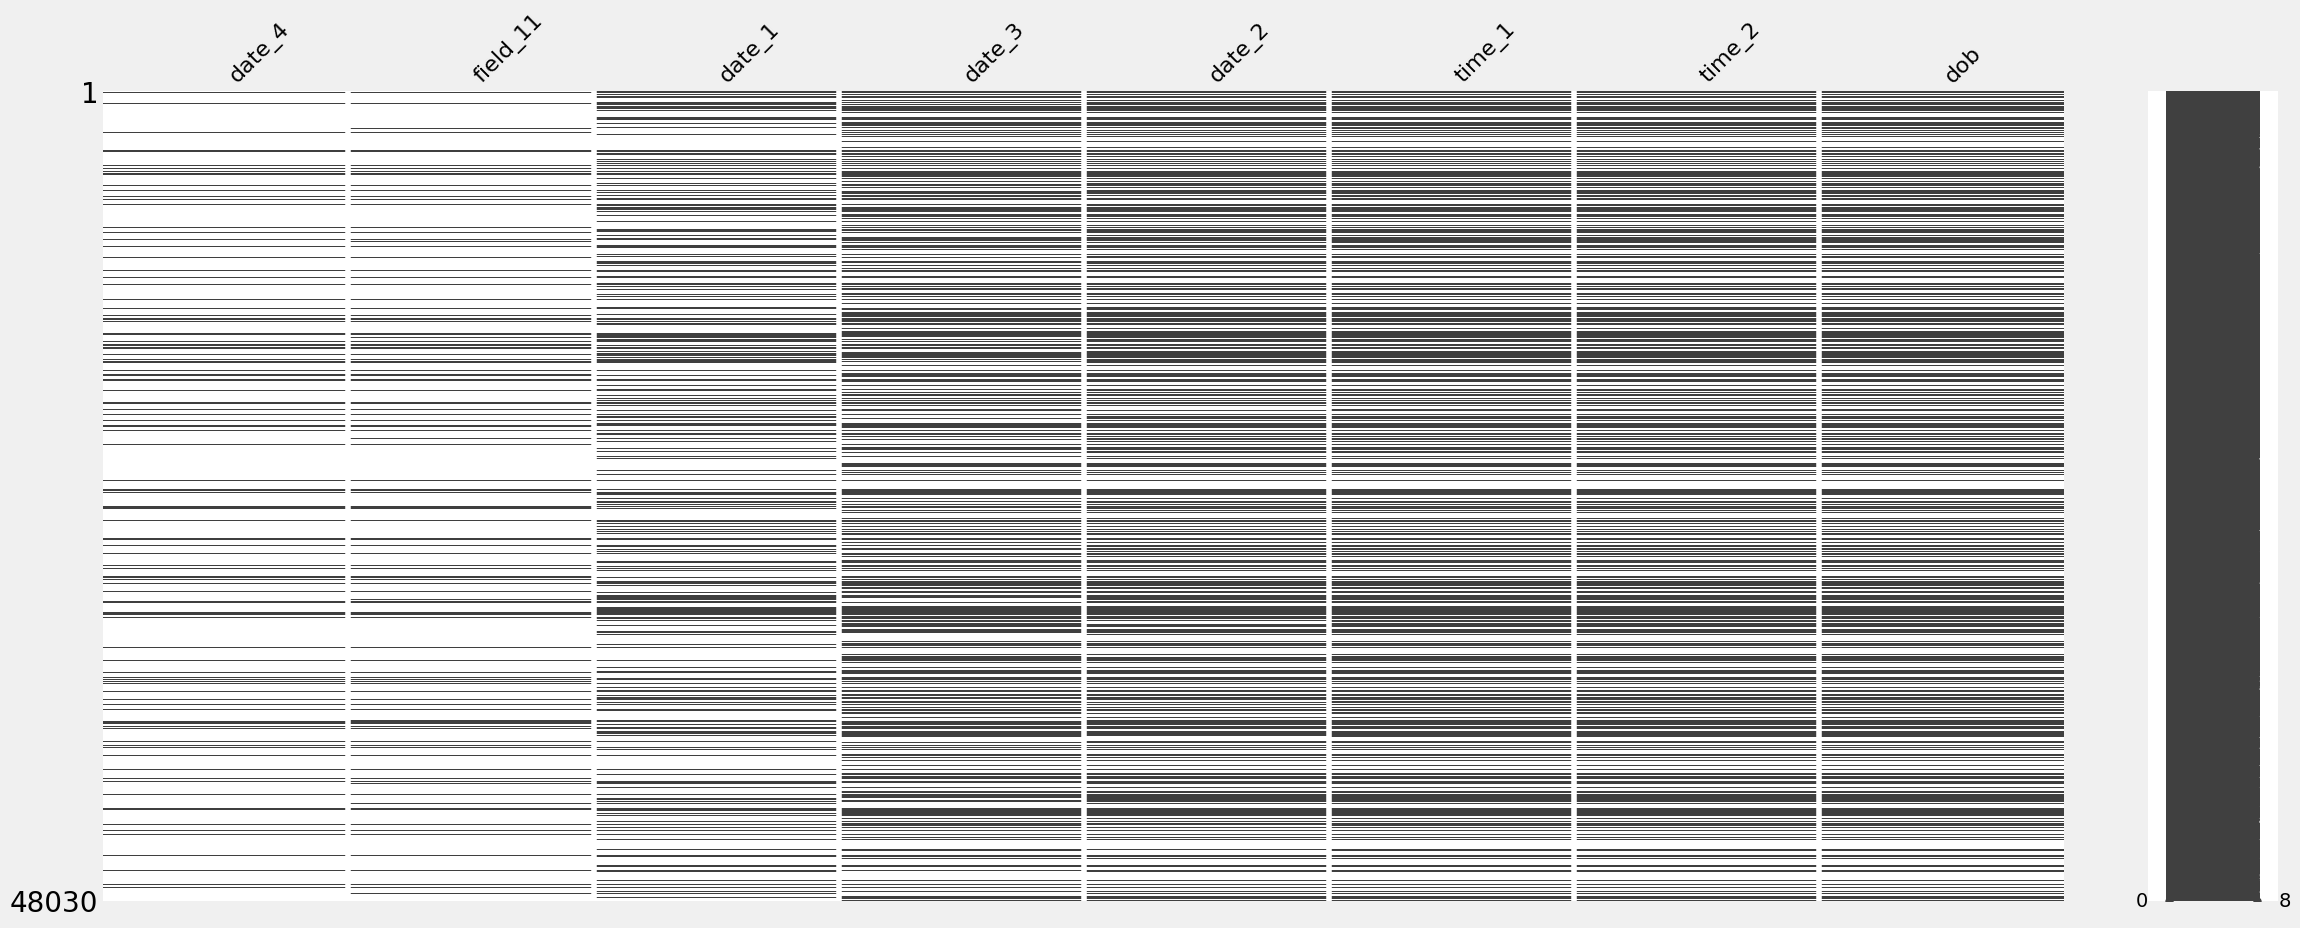

In [16]:
#Datetime variables
missing_date = (train_df.select_dtypes(exclude=['float','int64','object']).isnull().sum()/len(train_df)).sort_values(ascending=False)
with pd.option_context('display.max_rows',len(missing_date)):
    print(missing_date)
msno.matrix(train_df.select_dtypes(exclude=['float','int64','object']).loc[:,missing_date.index])

In [17]:
# Remove columns with many missing values
removal_col = ['cat_4','job_detail','current_location_city','review_value','date_4','date_1','field_11']
train_df.drop(removal_col,axis=1,inplace=True)
test_df.drop(removal_col,axis=1,inplace=True)

print(train_df.shape)
print(test_df.shape)

(48030, 45)
(5000, 44)


- Examine the relationship between the categorical variables and target variables

class_1    12406
class_2    10585
Name: cat_1, dtype: int64


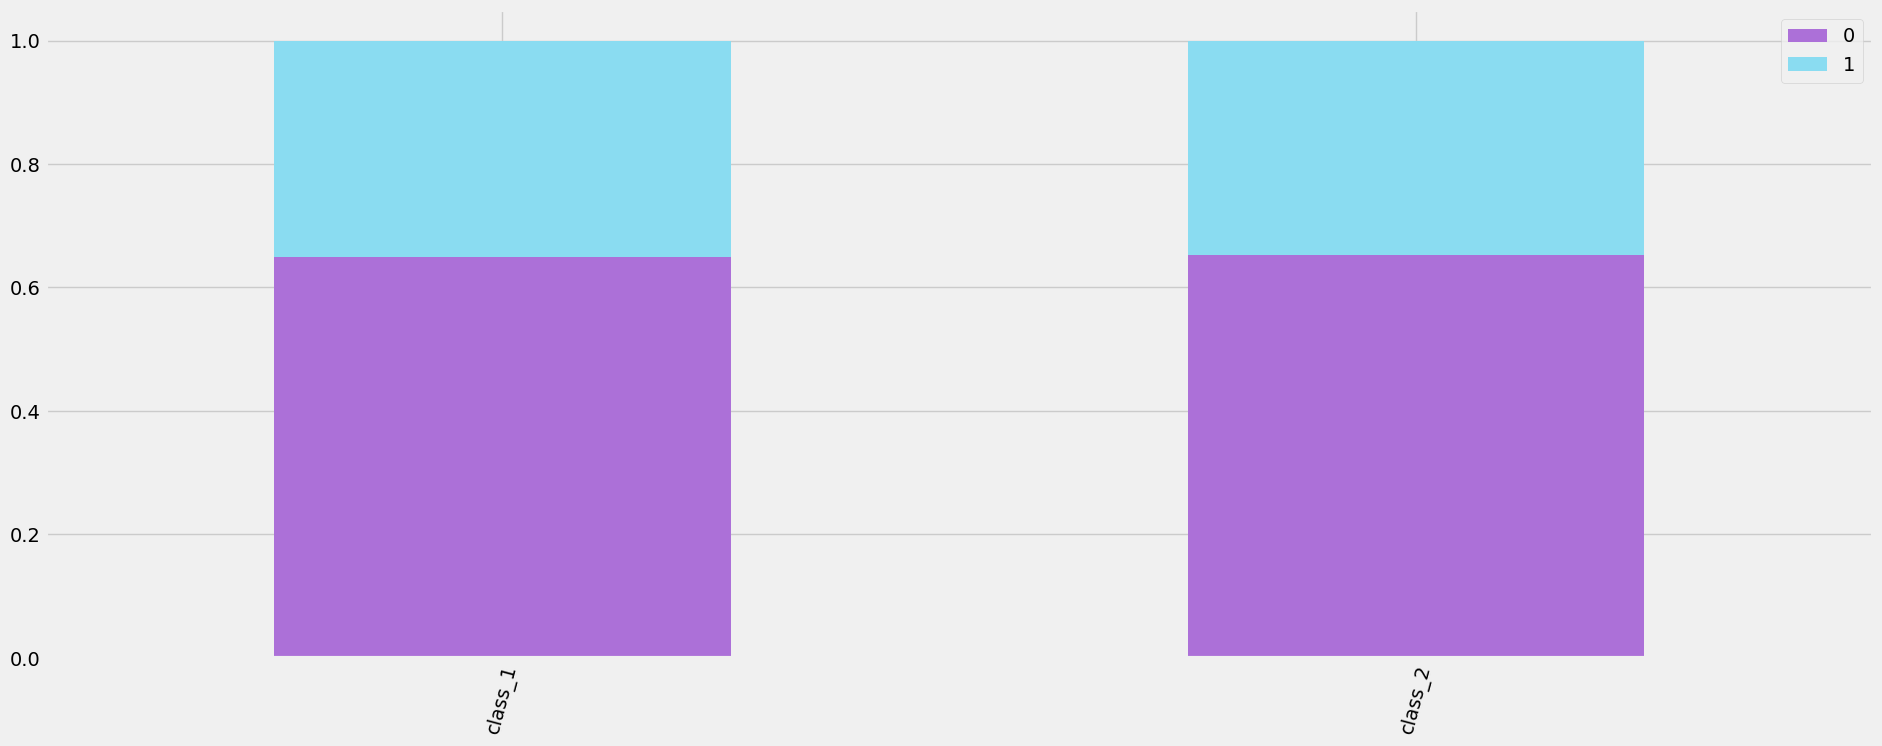

interactive(children=(Dropdown(description='Feature:', options=('cat_1', 'cat_2', 'cat_3', 'cat_6', 'sex', 'lo…

In [18]:
features = widgets.Dropdown(
    options= train_df.select_dtypes('object').columns,
    value='cat_1',
    description='Feature:',
)
def category_relationship_target(column):
    category_list = []
    data = train_df.copy()
    for i in data[column].value_counts().head(30).index:
        category_list.append(data[data[column] == i]['label'].value_counts(normalize=True).sort_index().to_list())
    df_plot = pd.DataFrame(category_list,index=data[column].value_counts().head(30).index).fillna(0)
    df_plot.plot(kind='bar',stacked=True,figsize=(21,8),rot=75,color=['#ac70d8','#8adcf1'])
    
    print(data[column].value_counts().head(30))
    
    return plt.show()

interactive(category_relationship_target,column=features)

In [19]:
# Remove category variables have unclear relationship with the target variable
train_df.drop(['cat_1','cat_2','cat_7','cat_9','sex'],axis=1,inplace=True)
test_df.drop(['cat_1','cat_2','cat_7','cat_9','sex'],axis=1,inplace=True)

- Transform category variables based on the relationship with the target variable

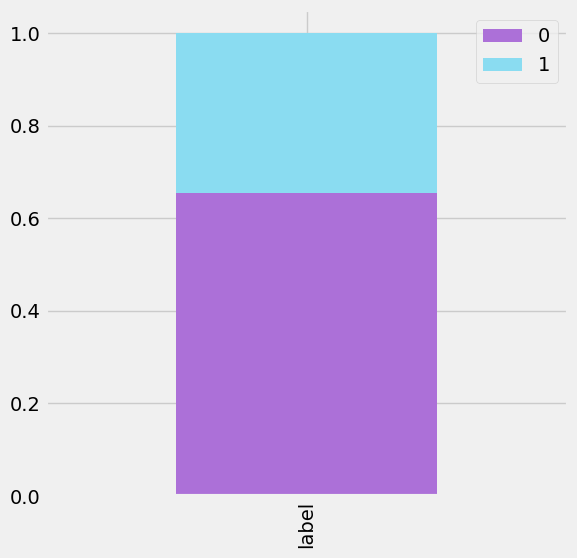

In [20]:
# Target variable distribution
train_df['label'].value_counts(normalize=True).reset_index().T.iloc[[1]].plot(kind='bar',stacked=True,figsize=(6,6),color=['#ac70d8','#8adcf1'])
plt.show()

In [21]:
# cat_3
cat_3_mapping = {
    'class_0':'S','class_1':'L','class_2':'M',
    'class_3':'S1','class_4':'S','class_5':'S'
}
train_df['cat_3'] = train_df['cat_3'].map(cat_3_mapping)
test_df['cat_3'] = test_df['cat_3'].map(cat_3_mapping)

In [22]:
# cat_6
cat_6_mapping = {
    'class_0':'S','class_1':'L','class_2':'S1'
}
train_df['cat_6'] = train_df['cat_6'].map(cat_6_mapping)
test_df['cat_6'] = test_df['cat_6'].map(cat_6_mapping)

In [23]:
# cat_8
cat_8_mapping = {
    'BX':'S','SF':'S1','AN':'S1','QG':'S1','AS':'S1','SC':'S1',
    'TR':'S1','FJ':'S','HR':'S','EC':'S','NM':'S1','SU':'S1',
    'AY':'S1','A2':'S','BB':'S','CA':'S1','SE':'S','BE':'S1',
    'BQ':'S1','NJ':'S','NC':'S','HP':'S','FF':'S','EG':'S',
    'FI':'S','T2':'S','QP':'S','HQ':'S','FH':'S','B2':'S',
    'NE':'S1','AB':'S','QO':'S1','NG':'S','QH':'S','HN':'S1',
    'EB':'S1','QL':'S','QM':'S','NF':'S1','FE':'S','FD':'S1',
    'QD':'S1','EA':'S1','AH':'S1','QB':'S1','FC':'S1',
    'FB':'S','HO':'S','HM':'S1','BH':'S','QI':'S','QF':'S1','FG':'S1',
    'FA':'S','BT':'S1','T5':'S1','T3':'S1','DZ':'S','QE':'S',
    'QC':'S','T1':'S','AA':'S1','BA':'S','HL':'S','BP':'S',
    'T7':'S','QA':'S1','TT':'S1','YV':'S','TS':'S','TQ':'S',
    'HK':'S','AI':'M1','HJ':'M','AL':'M1','TU':'M','KC':'M',
    'TP':'M','AQ':'M','TX':'M','TV':'M','TK':'M','TY':'M',
    'HI':'M','T9':'M','HD':'M1','HC':'M1','HB':'M','HE':'M',
    'HF':'M','HG':'M','AC':'M','HW':'M','HH':'M1','BN':'M',
    'TJ':'M','TN':'M','TW':'M','S':'S','TM':'M','AO':'M',
    'TO':'M','HA':'M','AP':'M1','TH':'M','BD':'M','AR':'M',
    'TI':'M','TL':'M','HZ':'M','QZ':'M','TD':'L','TB':'L',
    'TC':'L','TE':'L','TG':'L','QW':'L','TF':'L','TZ':'L',
    'BO':'L','TA':'L','BI':'L','YN':'L'
}
min_cat_8 = train_df['cat_8'].value_counts()
train_df.loc[train_df['cat_8'].isin(min_cat_8[min_cat_8<5].index),'cat_8'] = 'S'
test_df.loc[test_df['cat_8'].isin(min_cat_8[min_cat_8<5].index),'cat_8'] = 'S'
train_df['cat_8'] = train_df['cat_8'].map(cat_8_mapping)
test_df['cat_8'] = test_df['cat_8'].map(cat_8_mapping)

In [24]:
# cat_10
cat_10_mapping = {
    'class_0':'M','class_1':'S1','class_2':'L','class_3':'M','class_4':'M',
    'class_5':'M','class_6':'S1','class_7':'S','class_8':'M1','class_9':'S1'
}
train_df['cat_10'] = train_df['cat_10'].map(cat_10_mapping)
test_df['cat_10'] = test_df['cat_10'].map(cat_10_mapping)

In [25]:
# cat_11
cat_11_mapping = {
    'class_1':'L','class_2':'M1','class_3':'S','class_4':'S1','class_5':'M'
}
train_df['cat_11'] = train_df['cat_11'].map(cat_11_mapping)
test_df['cat_11'] = test_df['cat_11'].map(cat_11_mapping)

In [26]:
# cat_12
cat_12_mapping = {
    'class_1':'M','class_2':'L','class_3':'L','class_4':'L',
    'class_5':'M1','class_6':'L','class_7':'S','class_8':'S1'
}
train_df['cat_12'] = train_df['cat_12'].map(cat_12_mapping)
test_df['cat_12'] = test_df['cat_12'].map(cat_12_mapping)

In [27]:
# location_id
location_id_mapping = {
    'XV':'S','CY':'S','XN':'S','HK':'S','B3':'S','HG':'S','TC':'S','CB':'S',
    'TS':'S','HD':'S','TA':'S','HX':'S','HS':'S','TK':'S','NN':'S','XD':'S',
    'NO':'S1','CK':'S1','TE':'S1','KC':'S1','HT':'S1','BT':'S1',
    'XK':'M','HN':'M','CN':'M1','DT':'M1','DK':'M1','GB':'M1','SV':'M1',
    'CH':'L','TN':'L','HC':'L','GD':'L','DN':'L'
}
train_df['location_id'] = train_df['location_id'].map(location_id_mapping)
test_df['location_id'] = test_df['location_id'].map(location_id_mapping)

In [28]:
# com_type
com_type_mapping = {
    'Vùng 1':'L','DN đầu tư NN (Vùng 1 có ĐT) {01->09, 15}':'S',
    'Vùng 2':'M','DN đầu tư NN (Vùng 2 có ĐT) {10->14, 16, 19->23, 25, 29}':'S1',
    'Vùng 3':'M','DN đầu tư NN (Vùng 3 có ĐT) {17, 18, 24, 26->28}':'S',
    'Vùng 4':'S1','DN đầu tư NN (Vùng 4 có ĐT)':'S1',
    'DN tư nhân':'S1'
}
train_df['com_type'] = train_df['com_type'].map(com_type_mapping)
test_df['com_type'] = test_df['com_type'].map(com_type_mapping)

- Handlle datetime variables

In [29]:
train_df.select_dtypes(exclude=['object','int','float'])

,time_1,time_2,date_2,date_3,dob
0,NaT,NaT,NaT,NaT,NaT
1,NaT,NaT,NaT,NaT,NaT
2,2017-01-23 18:00:32.690000+00:00,2017-01-23 18:00:32.690000+00:00,NaT,NaT,1981-08-07
3,NaT,NaT,NaT,NaT,NaT
4,NaT,NaT,NaT,NaT,NaT
...,...,...,...,...,...
48025,2019-08-30 01:08:24+00:00,2019-09-25 20:10:07+00:00,2019-07-11,2020-03-26,1985-05-07
48026,NaT,NaT,NaT,NaT,NaT
48027,NaT,NaT,NaT,NaT,NaT
48028,NaT,NaT,NaT,NaT,NaT


In [30]:
# Time that the transaction is fully processed minus time perform the transaction by customer (days)
delta_time = (train_df['time_2'] - train_df['time_1']).dt.components
train_df['delta_time'] = ((((delta_time['days']*24 + delta_time['hours'])*60 + delta_time['minutes'])/60)/24).round(3)
delta_time_test = (test_df['time_2'] - test_df['time_1']).dt.components
test_df['delta_time'] = ((((delta_time_test['days']*24 + delta_time_test['hours'])*60 + delta_time_test['minutes'])/60)/24).round(3)

In [31]:
# Time 2 and time 3
train_df['delta_date'] = (train_df['date_3'].dt.date - train_df['date_2'].dt.date).dt.components['days']
test_df['delta_date'] = (test_df['date_3'].dt.date - test_df['date_2'].dt.date).dt.components['days']

In [32]:
# Convert DOB to age
train_df['age'] = 2022 - train_df['dob'].dt.year
test_df['age'] = 2022 - test_df['dob'].dt.year

In [33]:
train_df.drop(['time_1','time_2','date_2','date_3','dob'],axis=1,inplace=True)
test_df.drop(['time_1','time_2','date_2','date_3','dob'],axis=1,inplace=True)

- Visualize and remove outliers from numerical variables

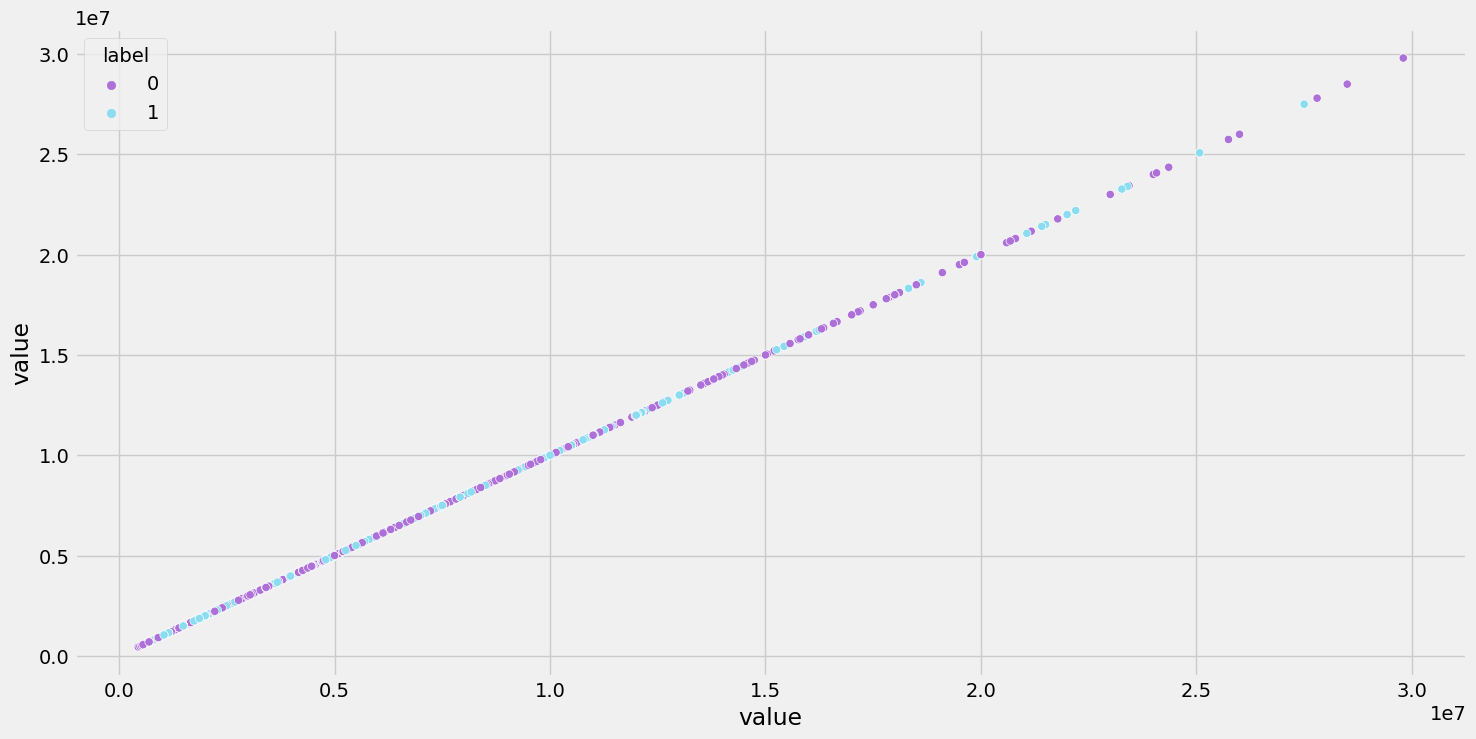

interactive(children=(Dropdown(description='Feature:', index=1, options=('mul_rate', 'value', 'num_date_review…

In [34]:
features = widgets.Dropdown(
    options= train_df.select_dtypes('float').columns,
    value='value',
    description='Feature:',
)
def numerics_relationship(feature):
    plt.subplots(figsize=(16,8))
    sns.scatterplot(x='value', y=feature,data=train_df,hue='label',palette=['#ac70d8','#8adcf1'])
    
    return plt.show()

interactive(numerics_relationship,feature=features)

In [35]:
train_df = train_df[~(train_df['num_trans_last_month'] > 60)]
train_df = train_df[~(train_df['unknown_var_1'] > 150)]
train_df = train_df[~(train_df['unknown_var_2'] > 150)]
train_df = train_df[~(train_df['unknown_var_3'] > 100)]
train_df = train_df[~(train_df['unknown_var_4'] > 100)]
train_df = train_df[~(train_df['unknown_var_8'] > 250)]
train_df = train_df[~(train_df['social_subcriber_count'] > 20000)]
train_df = train_df[~((train_df['age'] > 100) | (train_df['age'] < 20))]
train_df.reset_index(drop=True,inplace=True)

- Examine the distribution of numerical variables

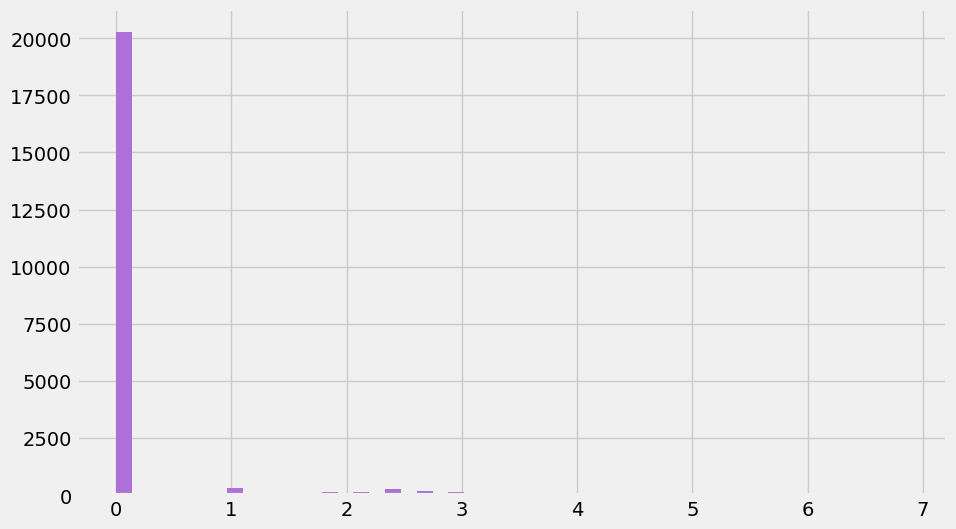

interactive(children=(Dropdown(description='Feature:', options=('mul_rate', 'value', 'num_date_review', 'num_t…

In [36]:
features = widgets.Dropdown(
    options= train_df.select_dtypes('float').columns,
    value='mul_rate',
    description='Feature:',
)
def numeric_distribution(column):
    data = train_df.copy()
    data[column].hist(figsize=(10,6),bins=50,color='#ac70d8')
    
    return plt.show()

interactive(numeric_distribution,column=features)

- Remove variables with low variance

In [37]:
train_df.select_dtypes('float').var().round(3).apply(lambda x: '%.4f' % x).reset_index().rename(columns={'index':'variables',0:'variance'})

,variables,variance
0,mul_rate,0.7100
1,value,5204820832667.1816
2,num_date_review,2198.4820
3,num_trans_last_month,191.1010
4,unknown_var_1,47.5700
5,unknown_var_2,39.5570
6,unknown_var_3,22.5840
7,unknown_var_4,11.5720
8,unknown_var_5,1.6420
9,unknown_var_6,0.0890


In [38]:
train_df.drop('unknown_var_16',axis=1,inplace=True)
test_df.drop('unknown_var_16',axis=1,inplace=True)

- Examine the relationship between the numerical variables and target variable

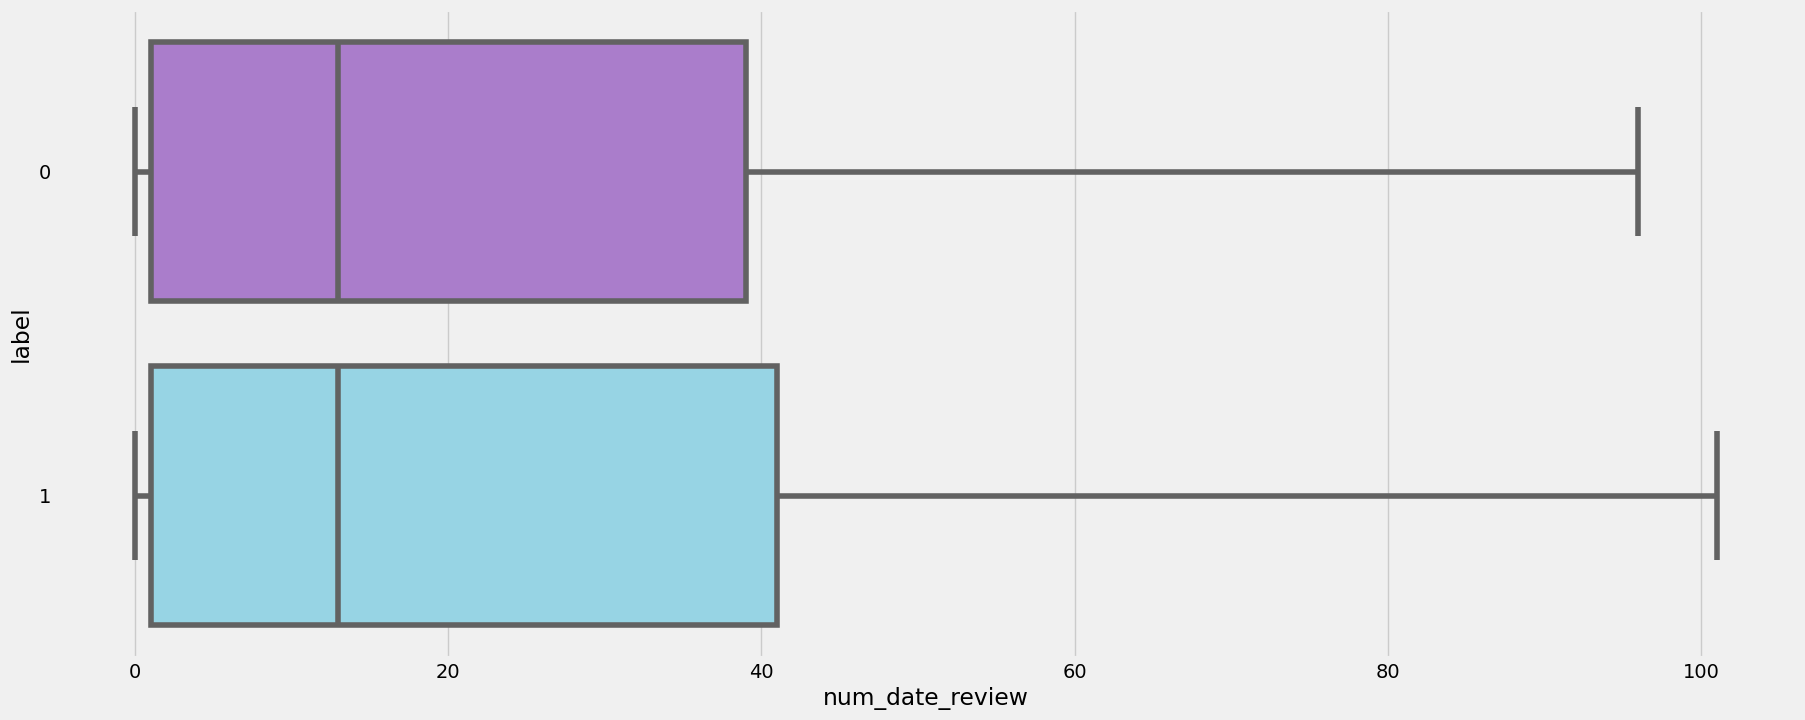

interactive(children=(Dropdown(description='Feature:', index=2, options=('mul_rate', 'value', 'num_date_review…

In [39]:
features = widgets.Dropdown(
    options= train_df.select_dtypes('float').columns,
    value='num_date_review',
    description='Feature:',
)
def numerical_relationship_target(column):
    data = train_df.copy()
    data['label'] = data['label'].map({1:'1',0:'0'})
    plt.subplots(figsize=(20,8))
    sns.boxplot(x=column,data=data,y='label',showfliers=False,palette=['#ac70d8','#8adcf1'])
    
    return plt.show()

interactive(numerical_relationship_target,column=features)

In [40]:
# Remove numerical variables have unclear relationship with the target variable
removal_col = [
    'mul_rate','num_trans_last_month','unknown_var_1','unknown_var_2','unknown_var_3','unknown_var_4',
    'unknown_var_5','unknown_var_6','unknown_var_10','unknown_var_11','unknown_var_12','unknown_var_14',
    'unknown_var_15','unknown_var_18','unknown_var_19','unknown_var_20','social_subcriber_count'
]
train_df.drop(removal_col,axis=1,inplace=True)
test_df.drop(removal_col,axis=1,inplace=True)

In [41]:
print(train_df.shape)
print(test_df.shape)

(47459, 20)
(5000, 19)


- Handle missing values

In [42]:
#Fill the missing values of numerical variables
def fill_missing_numerical(feature,data):
    numerical_categorical_group = train_df.groupby(list(train_df.select_dtypes('object').columns))[feature].median().reset_index()
    numerical_categorical_group[feature] = numerical_categorical_group[feature].fillna(numerical_categorical_group[feature].median())

    missing_feature_data = data[data[feature].isnull()][list(data.select_dtypes('object').columns) + [feature]]
    for col in missing_feature_data.columns:
        if col != feature:
            missing_feature_data[col] = missing_feature_data[col].fillna(train_df[col].mode().values[0])
            
    categorical_group_available = missing_feature_data.select_dtypes('object').drop_duplicates()
    for i in categorical_group_available.dropna().iterrows():
        cat_3 = i[1]['cat_3']
        cat_6 = i[1]['cat_6']
        location_id = i[1]['location_id']
        cat_8 = i[1]['cat_8']
        cat_10 = i[1]['cat_10']
        cat_11 = i[1]['cat_11']
        com_type = i[1]['com_type']
        cat_12 = i[1]['cat_12']
        try:
            missing_feature_data.loc[
                (missing_feature_data['cat_3'] == cat_3) &
                (missing_feature_data['cat_6'] == cat_6) &
                (missing_feature_data['location_id'] == location_id) &
                (missing_feature_data['cat_8'] == cat_8) &
                (missing_feature_data['cat_10'] == cat_10) &
                (missing_feature_data['cat_11'] == cat_11) &
                (missing_feature_data['com_type'] == com_type) &
                (missing_feature_data['cat_12'] == cat_12),
                feature
            ] =  numerical_categorical_group.loc[
                (numerical_categorical_group['cat_3'] == cat_3) &
                (numerical_categorical_group['cat_6'] == cat_6) &
                (numerical_categorical_group['location_id'] == location_id) &
                (numerical_categorical_group['cat_8'] == cat_8) &
                (numerical_categorical_group['cat_10'] == cat_10) &
                (numerical_categorical_group['cat_11'] == cat_11) &
                (numerical_categorical_group['com_type'] == com_type) &
                (numerical_categorical_group['cat_12'] == cat_12),
                feature
            ].values[0]
        except:
            pass

    missing_feature_data.dropna(inplace=True)
    
    data.loc[missing_feature_data.index,feature] = missing_feature_data[feature]
    
    return data

In [43]:
# Fill the missing values of train set
for col in train_df.select_dtypes('float').columns:
    train_df = fill_missing_numerical(col,train_df)
    print(f'Filled {col}')
# Fill the rest missing values with the median
for col in train_df.select_dtypes('float').columns:
    train_df[col] = train_df[col].fillna(train_df[col].median())

Filled value
Filled num_date_review
Filled unknown_var_7
Filled unknown_var_8
Filled unknown_var_9
Filled unknown_var_13
Filled unknown_var_17
Filled social_friend_count
Filled delta_time
Filled delta_date
Filled age


In [44]:
# Fill the missing values of test set
for col in test_df.select_dtypes('float').columns:
    test_df = fill_missing_numerical(col,test_df)
    print(f'Filled {col}')
# Fill the rest missing values with the median
for col in test_df.select_dtypes('float').columns:
    test_df[col] = test_df[col].fillna(test_df[col].median())

Filled value
Filled num_date_review
Filled unknown_var_7
Filled unknown_var_8
Filled unknown_var_9
Filled unknown_var_13
Filled unknown_var_17
Filled social_friend_count
Filled delta_time
Filled delta_date
Filled age


In [45]:
#Fill the missing values of categorical variables
from sklearn.tree import DecisionTreeClassifier
def fill_missing_categorical(feature,data):
    train = train_df[list(train_df.select_dtypes('float').columns) + [feature]].dropna()

    missing_feature_data = data.loc[data[feature].isnull()][list(data.select_dtypes('float').columns) + [feature]]
    
    tree = DecisionTreeClassifier(random_state=44,criterion='log_loss')
    tree.fit(train.drop(feature,axis=1),train[feature])
    
    data.loc[missing_feature_data.index,feature] = tree.predict(missing_feature_data.drop(feature,axis=1))
    
    return data

In [46]:
# Fill the missing values of train set
for col in train_df.select_dtypes('object').columns:
    train_df = fill_missing_categorical(col,train_df)
    print(f'Filled {col}')

Filled cat_3
Filled cat_6
Filled location_id
Filled cat_8
Filled cat_10
Filled cat_11
Filled com_type
Filled cat_12


In [47]:
# Fill the missing values of test set
for col in test_df.select_dtypes('object').columns:
    test_df = fill_missing_categorical(col,test_df)
    print(f'Filled {col}')

Filled cat_3
Filled cat_6
Filled location_id
Filled cat_8
Filled cat_10
Filled cat_11
Filled com_type
Filled cat_12


In [48]:
train_df.to_csv('train_attacker_2022_cleaned.csv',index=False)
test_df.to_csv('test_attacker_2022_cleaned.csv',index=False)